In [12]:
## This has been taken from the Github repository of James Hope. 
## Example of a Linear SVM Classifier (SVC) with hard margin decision boundaries

In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [14]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [15]:
#define a function to create a toy dataset (credit: PRML book)
def create_toy_data(add_outliers=False, add_class=False):
    np.random.seed(4742023) 
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(int)

In [16]:
## Construct some test data

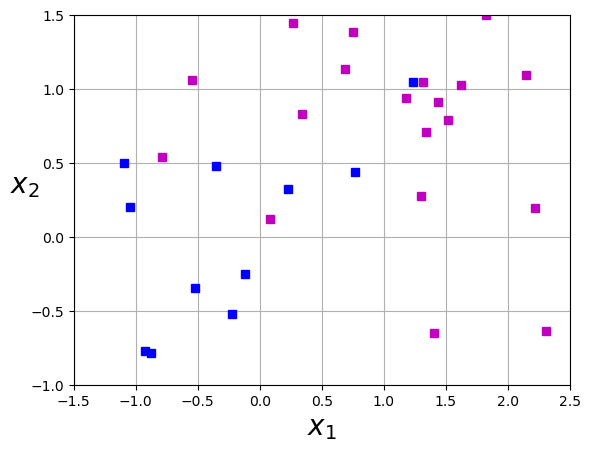

In [17]:
X, y = create_toy_data()
#define a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

#Let's have a look at the data we have generated
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [18]:
#define a function plot the decision boundaries
def plot_predictions(clf, axes):
    #create data in continous linear space
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [19]:
## Build the model and set hyperparameters

In [20]:
#C controls the width of the street
#Degree of data

#create a pipeline to create features, scale data and fit the model
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")) #hinge applies Stochastic Gradient Descent
))

#call the pipeline
polynomial_svm_clf.fit(X,y)

/home/jared/anaconda3/envs/ComputerVision/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [21]:
## Plot the decision boundaries

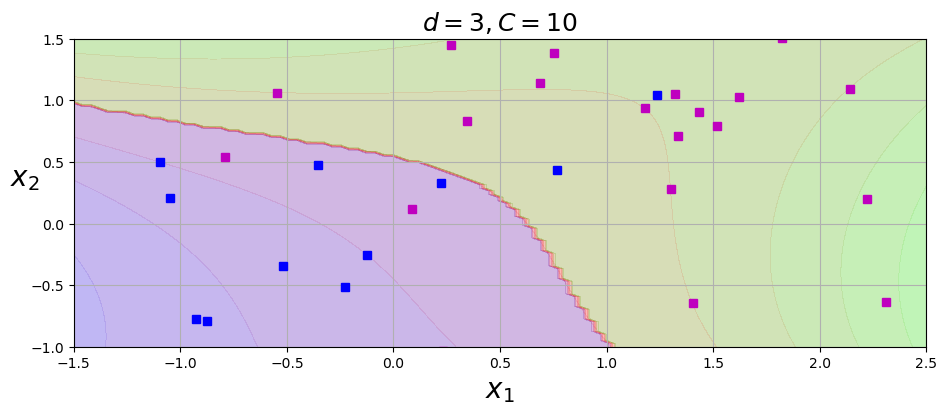

In [22]:
#plot the decision boundaries
plt.figure(figsize=(11, 4))

#plot the decision boundaries
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

#plot the dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title(r"$d=3, C=10$", fontsize=18)
plt.show()